In [1]:
# create masked dataset
import os
import sys
import json
import datetime
import numpy as np
import skimage.draw
import skimage.io
import csv
import itertools
import pycococreatortools.pycococreatortools as cpt
import pycocotools.mask as maskUtils
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
annotation_file_path = "/home/wuyuanyi/Desktop/MicroVisionLabelling/Dataset/Batch 2/via_region_data.csv"

In [3]:
with open(annotation_file_path, "r") as annotation_file:
        annotation = csv.reader(annotation_file)
        next(annotation) # skip the first comment line
        grouped_annotation = itertools.groupby(annotation, lambda x: x[0])
        for image_file, g in grouped_annotation:
            shape_entries = [json.loads(x[5]) for x in g]
            # skip empty files (without label)
            if not bool(shape_entries[0]):
                continue


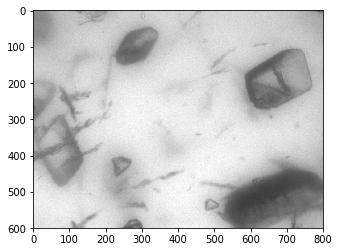

In [4]:
img_path="/home/wuyuanyi/Desktop/MicroVisionLabelling/Dataset/Batch 2/1526492386701.png"
img = skimage.io.imread(img_path)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)

In [5]:
shape_entries

[{u'all_points_x': [256,
   321,
   352,
   383,
   422,
   438,
   427,
   409,
   342,
   323,
   312,
   300,
   251,
   256],
  u'all_points_y': [204,
   237,
   218,
   193,
   142,
   110,
   96,
   89,
   63,
   65,
   76,
   96,
   178,
   204],
  u'name': u'polygon'},
 {u'all_points_x': [563, 584, 617, 642, 633, 617, 569, 563],
  u'all_points_y': [281, 265, 262, 274, 299, 309, 303, 281],
  u'name': u'polygon'},
 {u'all_points_x': [695,
   684,
   674,
   675,
   683,
   695,
   723,
   738,
   749,
   749,
   742,
   721,
   713,
   710,
   699,
   687,
   695],
  u'all_points_y': [58,
   64,
   71,
   84,
   95,
   107,
   114,
   116,
   104,
   80,
   63,
   53,
   57,
   65,
   65,
   59,
   58],
  u'name': u'polygon'},
 {u'all_points_x': [5, 23, 37, 51, 54, 35, 19, 4, 0, 5],
  u'all_points_y': [264, 292, 312, 335, 354, 364, 362, 363, 368, 264],
  u'name': u'polygon'},
 {u'all_points_x': [799, 772, 745, 734, 744, 751, 769, 799, 799],
  u'all_points_y': [419, 415, 410, 398,

In [7]:
# correct mask
mask = np.zeros(img.shape)
shape = shape_entries[0]
if shape["name"] == "circle":
    rr, cc = skimage.draw.circle(shape['cy'], shape['cx'], shape['r'], shape=img.shape)
else:
    rr, cc = skimage.draw.polygon(shape['all_points_y'], shape['all_points_x'], shape=img.shape)
mask[rr,cc]=1

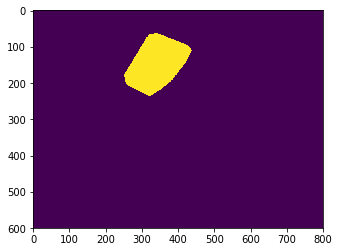

In [8]:
plt.imshow(mask)

In [9]:
fmask = np.asfortranarray(mask.astype(np.uint8))
m = maskUtils.encode(fmask)

In [10]:
maskUtils.decode(m).shape
mask = mask[:, ::-1, :]

IndexError: too many indices for array

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.draw import ellipse
from skimage.measure import find_contours, approximate_polygon, subdivide_polygon

polycoors =  np.stack((rr, cc), axis=1)
app_polygon = approximate_polygon(polycoors, 0.1)
app_polygon.shape

(346, 2)

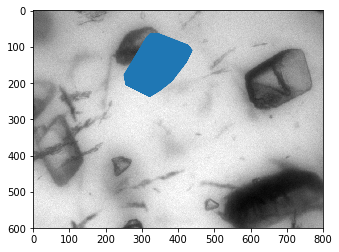

In [12]:
plt.imshow(img,cmap='gray')
plt.plot(app_polygon[:,1], app_polygon[:,0])

In [13]:
xmin = app_polygon[:,1].min()
ymin = app_polygon[:,0].min()
xmax = app_polygon[:,1].max()
ymax = app_polygon[:,0].max()

bbox = (xmin, ymin, xmax-xmin, ymax-ymin)
bbox

(251, 64, 186, 172)

In [14]:
ann = cpt.create_annotation_info(1,1, {'id': 1, 'is_crowd': False}, mask, img.shape, tolerance=0.01)

In [15]:
INFO = {
    "description": "Crystal Dataset",
    "url": "https://github.com/wuyuanyi135/",
    "version": "0.1.0",
    "year": 2018,
    "contributor": "wuyuanyi",
    "date_created": datetime.datetime.utcnow().isoformat(' ')
}
LICENSES = [
    {
        "id": 1,
        "name": "Attribution-NonCommercial-ShareAlike License",
        "url": "http://creativecommons.org/licenses/by-nc-sa/2.0/"
    }
]
CATEGORIES = [
    {
        'id': 1,
        'name': 'gb',
        'supercategory': 'object',
    }
]

coco_output = {
        "info": INFO,
        "licenses": LICENSES,
        "categories": CATEGORIES,
        "images": [cpt.create_image_info(1, img_path, img.shape)],
        "annotations": [ann]
    }
with open('data.json', 'w') as outfile:
    json.dump(coco_output, outfile)

In [22]:
import pycocotools.coco as coco

In [23]:
coco_instance = coco.COCO('../instances_train2014.json')

loading annotations into memory...
Done (t=0.02s)
creating index...


TypeError: 'NoneType' object has no attribute '__getitem__'

In [24]:
coco_instance

NameError: name 'coco_instance' is not defined

In [21]:
catIds = coco_instance.getCatIds(catNms=['gb']);
imgIds = coco_instance.getImgIds(catIds=catIds );

NameError: name 'coco_instance' is not defined

In [46]:
img = coco_instance.loadImgs([imgIds[np.random.randint(0,len(imgIds))]])[0]

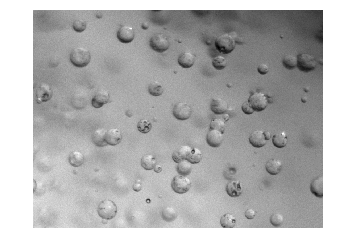

In [47]:
I = skimage.io.imread(img['file_name'])
plt.axis('off')
plt.imshow(I, cmap="gray")
plt.show()

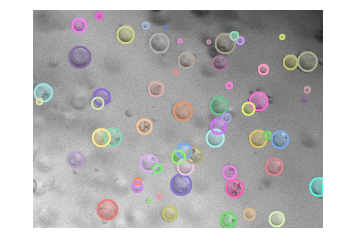

In [48]:
# load and display instance annotations
plt.imshow(I, cmap="gray"); plt.axis('off')
annIds = coco_instance.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_instance.loadAnns(annIds)
coco_instance.showAnns(anns)